# Titanic Contest - Nueral Network
---

## Imports

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pickle
from sklearn.model_selection import train_test_split


In [3]:
train_path = '../pickles/train_basic.pkl'
test_path = '../pickles/test_basic.pkl'

with open(train_path, 'rb') as f:
    train_full = pickle.load(f)

with open(test_path, 'rb') as f:
    test_full = pickle.load(f)

## Split Data

In [4]:
y = train_full['Survived']
X = train_full.drop(columns=['Survived'])

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape

(712, 7)

## Model


In [7]:
from keras.layers import Dense, Dropout, BatchNormalization

In [8]:
model = keras.Sequential([
    Dense(1024, activation='relu', input_shape=[7]),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 12:02:23.935071: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    patience= 10,
    min_delta = 0.001,
    restore_best_weights=True
)

In [11]:
history= model.fit(
    X_train, y_train,
    validation_data= (X_valid, y_valid),
    batch_size = 512,
    epochs= 1000,
    callbacks = [early_stopping],
    verbose=0
)

Best Validation Loss: 0.6887
Best Validation Accuracy: 0.7039


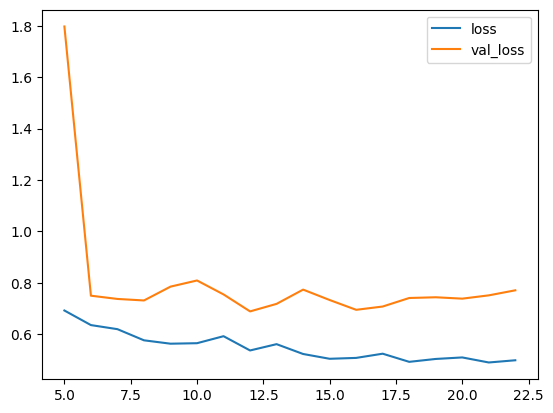

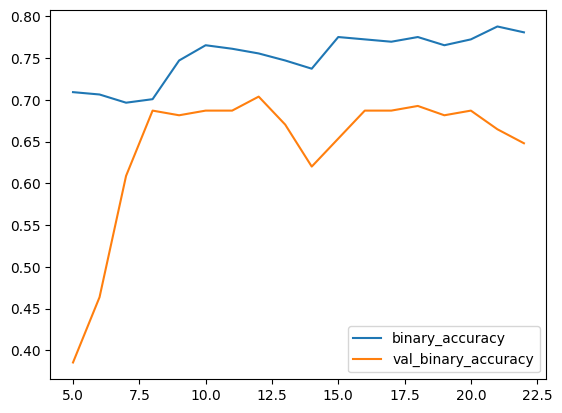

In [12]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

## Export

In [13]:
from datetime import datetime
import pytz


predictions = model.predict(test_full)

df_dummy = pd.read_csv('../data/test.csv')

final = pd.DataFrame()
final['PassengerId'] = df_dummy['PassengerId']
final['Survived'] = [1 if x >= 0.5 else 0 for x in predictions]

date_time = datetime.now(tz=pytz.timezone('US/Eastern')).strftime("%Y_%m_%d-%H_%M_%S_%p")
file_path = f'../submissions/submission_{date_time}.csv'
final.to_csv(file_path, index = False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Score : 67.703 %